
## Approche Digitalo-Analytique












In [43]:
import joblib 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score


In [44]:
# Générer une plage de dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 5, 30)
date_range = pd.date_range(start_date, end_date, freq='D')

# Générer des données météorologiques fictives
air_temperature = np.random.uniform(low=-89.2, high=56.7, size=len(date_range))  
precipitation = np.random.uniform(low=0, high=1800, size=len(date_range))  
relative_humidity = np.random.uniform(low=0, high=100, size=len(date_range))  
atmospheric_pressure = np.random.uniform(low=870, high=1085, size=len(date_range))  
wind_speed = np.random.uniform(low=0, high=300, size=len(date_range))  
sunshine_duration = np.random.uniform(low=0, high=24, size=len(date_range))  
visibility = np.random.uniform(low=0, high=100000, size=len(date_range))  
cloud_cover = np.random.uniform(low=0, high=100, size=len(date_range))  

# Générer des tâches agricoles fictives
tasks = ['Sow', 'Irrigate', 'Fertilize', 'Weed', 'Prick', 'Prune', 'Hoe', 'Harvest']
task_probabilities = [0.2, 0.1, 0.05, 0.1, 0.15, 0.12, 0.08, 0.2]  # Probabilités pour chaque tâche
agricultural_tasks = [random.choices(tasks, weights=task_probabilities, k=1)[0] for _ in date_range]

# Générer des cultures fictives
crops = ['Coffee','Cacao','Cassava','Plantain','Cocoyam','Tomatoes','Beans', 'Peanuts']
crops_probabilities = [0.2, 0.1, 0.05, 0.1, 0.15, 0.12, 0.08, 0.2]   
agricultural_crops = [random.choices(crops, weights=crops_probabilities, k=1)[0] for _ in date_range]



# Créer un DataFrame
dataSet = {
    'Date': date_range,
    'Agricultural Tasks': agricultural_tasks,
    'Agricultural Crops': agricultural_crops,
    'Precipitation (mm)': precipitation,
    'Air Temperature (°C)': air_temperature,
    'Relative Humidity (%)': relative_humidity,
    'Atmospheric Pressure (hPa)': atmospheric_pressure,
    'Wind Speed (km/h)': wind_speed,
    'Cloud Cover (%)': cloud_cover,
    'Sunshine Duration (h)': sunshine_duration,
    'Visibility (m)': visibility
}

dataframe = pd.DataFrame(dataSet)

# Afficher les premières lignes du DataFrame
dataframe.head()


Date Agricultural Tasks Agricultural Crops  Precipitation (mm)  \
0 2020-01-01                Sow            Peanuts          591.411406   
1 2020-01-02              Prune           Plantain          257.416005   
2 2020-01-03              Prick              Cacao          843.924296   
3 2020-01-04          Fertilize           Tomatoes         1386.551951   
4 2020-01-05          Fertilize            Cocoyam          242.287414   

   Air Temperature (°C)  Relative Humidity (%)  Atmospheric Pressure (hPa)  \
0            -64.889231              25.851696                  903.210619   
1            -84.230200              98.712129                 1026.587364   
2            -41.835330              75.129531                  900.644906   
3             28.142885              94.620744                  949.690592   
4            -30.041595              47.312174                 1062.577562   

   Wind Speed (km/h)  Cloud Cover (%)  Sunshine Duration (h)  Visibility (m)  
0          40.009067        48.304379              15.358307    88742.086466  
1          21.405984        54.404334              22.950390    46081.545758  
2          59.677333        12.450563              21.732472    12678.823108  
3          38.965979        41.271329               6.324999    58795.788165  
4         241.015432         3.236693              20.206181    42850.788108

In [45]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1612 non-null   datetime64[ns]
 1   Agricultural Tasks          1612 non-null   object        
 2   Agricultural Crops          1612 non-null   object        
 3   Precipitation (mm)          1612 non-null   float64       
 4   Air Temperature (°C)        1612 non-null   float64       
 5   Relative Humidity (%)       1612 non-null   float64       
 6   Atmospheric Pressure (hPa)  1612 non-null   float64       
 7   Wind Speed (km/h)           1612 non-null   float64       
 8   Cloud Cover (%)             1612 non-null   float64       
 9   Sunshine Duration (h)       1612 non-null   float64       
 10  Visibility (m)              1612 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage

In [46]:
dataframe.describe()

Date  Precipitation (mm)  Air Temperature (°C)  \
count                 1612         1612.000000           1612.000000   
mean   2022-03-16 12:00:00          918.259825            -16.148530   
min    2020-01-01 00:00:00            0.848036            -89.174879   
25%    2021-02-06 18:00:00          479.882954            -52.422961   
50%    2022-03-16 12:00:00          917.397065            -15.605731   
75%    2023-04-23 06:00:00         1361.406588             20.620380   
max    2024-05-30 00:00:00         1799.702390             56.554075   
std                    NaN          522.815741             42.208251   

       Relative Humidity (%)  Atmospheric Pressure (hPa)  Wind Speed (km/h)  \
count            1612.000000                 1612.000000        1612.000000   
mean               49.284563                  976.942655         152.666889   
min                 0.001431                  870.008281           0.563742   
25%                24.069001                  922.823308          78.964570   
50%                48.927699                  976.508853         152.525034   
75%                73.506032                 1029.428995         226.927254   
max                99.968087                 1084.795477         299.901715   
std                28.762166                   61.585085          85.387723   

       Cloud Cover (%)  Sunshine Duration (h)  Visibility (m)  
count      1612.000000            1612.000000     1612.000000  
mean         49.728168              11.925596    49929.151942  
min           0.009445               0.022994      137.609651  
25%          24.387909               5.819413    25719.863263  
50%          49.811918              12.035729    49763.598804  
75%          74.252145              17.855086    74750.644116  
max          99.948617              23.974606    99876.871905  
std          29.118833               6.910013    28529.849164

## Enregistrement du fichier des données

In [47]:
dataframe.to_csv('data/agricultural_data.csv', index=False)

## Chargement des données depuis un fichier de données

In [48]:
dataframe = pd.read_csv("data/agricultural_data.csv",index_col='Date',parse_dates=True)

## Affichage des données

In [49]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1612 entries, 2020-01-01 to 2024-05-30
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Agricultural Tasks          1612 non-null   object 
 1   Agricultural Crops          1612 non-null   object 
 2   Precipitation (mm)          1612 non-null   float64
 3   Air Temperature (°C)        1612 non-null   float64
 4   Relative Humidity (%)       1612 non-null   float64
 5   Atmospheric Pressure (hPa)  1612 non-null   float64
 6   Wind Speed (km/h)           1612 non-null   float64
 7   Cloud Cover (%)             1612 non-null   float64
 8   Sunshine Duration (h)       1612 non-null   float64
 9   Visibility (m)              1612 non-null   float64
dtypes: float64(8), object(2)
memory usage: 138.5+ KB


## Extraction des caractéristiques des données

In [50]:

# Remplacer les catégories
dataframe['Agricultural Tasks'] = dataframe['Agricultural Tasks'].astype('category').cat.codes
# Remplacer les culture par des numéros
dataframe['Agricultural Crops'] = dataframe['Agricultural Crops'].astype('category').cat.codes

X = dataframe.drop('Agricultural Tasks', axis=1)
y = dataframe['Agricultural Tasks']

In [51]:
X

Agricultural Crops  Precipitation (mm)  Air Temperature (°C)  \
Date                                                                       
2020-01-01                   5          591.411406            -64.889231   
2020-01-02                   6          257.416005            -84.230200   
2020-01-03                   1          843.924296            -41.835330   
2020-01-04                   7         1386.551951             28.142885   
2020-01-05                   3          242.287414            -30.041595   
...                        ...                 ...                   ...   
2024-05-26                   5          658.885753            -81.566248   
2024-05-27                   1         1751.952211            -11.436950   
2024-05-28                   1          167.377475             31.979444   
2024-05-29                   5          324.629730            -87.632106   
2024-05-30                   1         1210.035321            -33.994376   

            Relative Humidity (%)  Atmospheric Pressure (hPa)  \
Date                                                            
2020-01-01              25.851696                  903.210619   
2020-01-02              98.712129                 1026.587364   
2020-01-03              75.129531                  900.644906   
2020-01-04              94.620744                  949.690592   
2020-01-05              47.312174                 1062.577562   
...                           ...                         ...   
2024-05-26              50.079153                 1036.402605   
2024-05-27              74.473335                 1021.209936   
2024-05-28              85.997463                 1079.461969   
2024-05-29              15.629856                  928.304919   
2024-05-30              13.262253                  913.307823   

            Wind Speed (km/h)  Cloud Cover (%)  Sunshine Duration (h)  \
Date                                                                    
2020-01-01          40.009067        48.304379              15.358307   
2020-01-02          21.405984        54.404334              22.950390   
2020-01-03          59.677333        12.450563              21.732472   
2020-01-04          38.965979        41.271329               6.324999   
2020-01-05         241.015432         3.236693              20.206181   
...                       ...              ...                    ...   
2024-05-26         137.457617        30.225441              13.971599   
2024-05-27          98.740996        20.406985               2.452469   
2024-05-28         211.819798         4.465717              19.088921   
2024-05-29         170.717909        42.282709              16.548998   
2024-05-30         270.923391        95.480333               2.238445   

            Visibility (m)  
Date                        
2020-01-01    88742.086466  
2020-01-02    46081.545758  
2020-01-03    12678.823108  
2020-01-04    58795.788165  
2020-01-05    42850.788108  
...                    ...  
2024-05-26     6602.395368  
2024-05-27    46923.960644  
2024-05-28    93519.359933  
2024-05-29    34879.488743  
2024-05-30    54037.229978  

[1612 rows x 9 columns]

In [52]:
y

Date
2020-01-01    6
2020-01-02    5
2020-01-03    4
2020-01-04    0
2020-01-05    0
             ..
2024-05-26    6
2024-05-27    4
2024-05-28    1
2024-05-29    6
2024-05-30    2
Name: Agricultural Tasks, Length: 1612, dtype: int8

In [53]:
X

Agricultural Crops  Precipitation (mm)  Air Temperature (°C)  \
Date                                                                       
2020-01-01                   5          591.411406            -64.889231   
2020-01-02                   6          257.416005            -84.230200   
2020-01-03                   1          843.924296            -41.835330   
2020-01-04                   7         1386.551951             28.142885   
2020-01-05                   3          242.287414            -30.041595   
...                        ...                 ...                   ...   
2024-05-26                   5          658.885753            -81.566248   
2024-05-27                   1         1751.952211            -11.436950   
2024-05-28                   1          167.377475             31.979444   
2024-05-29                   5          324.629730            -87.632106   
2024-05-30                   1         1210.035321            -33.994376   

            Relative Humidity (%)  Atmospheric Pressure (hPa)  \
Date                                                            
2020-01-01              25.851696                  903.210619   
2020-01-02              98.712129                 1026.587364   
2020-01-03              75.129531                  900.644906   
2020-01-04              94.620744                  949.690592   
2020-01-05              47.312174                 1062.577562   
...                           ...                         ...   
2024-05-26              50.079153                 1036.402605   
2024-05-27              74.473335                 1021.209936   
2024-05-28              85.997463                 1079.461969   
2024-05-29              15.629856                  928.304919   
2024-05-30              13.262253                  913.307823   

            Wind Speed (km/h)  Cloud Cover (%)  Sunshine Duration (h)  \
Date                                                                    
2020-01-01          40.009067        48.304379              15.358307   
2020-01-02          21.405984        54.404334              22.950390   
2020-01-03          59.677333        12.450563              21.732472   
2020-01-04          38.965979        41.271329               6.324999   
2020-01-05         241.015432         3.236693              20.206181   
...                       ...              ...                    ...   
2024-05-26         137.457617        30.225441              13.971599   
2024-05-27          98.740996        20.406985               2.452469   
2024-05-28         211.819798         4.465717              19.088921   
2024-05-29         170.717909        42.282709              16.548998   
2024-05-30         270.923391        95.480333               2.238445   

            Visibility (m)  
Date                        
2020-01-01    88742.086466  
2020-01-02    46081.545758  
2020-01-03    12678.823108  
2020-01-04    58795.788165  
2020-01-05    42850.788108  
...                    ...  
2024-05-26     6602.395368  
2024-05-27    46923.960644  
2024-05-28    93519.359933  
2024-05-29    34879.488743  
2024-05-30    54037.229978  

[1612 rows x 9 columns]

In [54]:
y

Date
2020-01-01    6
2020-01-02    5
2020-01-03    4
2020-01-04    0
2020-01-05    0
             ..
2024-05-26    6
2024-05-27    4
2024-05-28    1
2024-05-29    6
2024-05-30    2
Name: Agricultural Tasks, Length: 1612, dtype: int8

In [55]:
dataframe.describe()

Agricultural Tasks  Agricultural Crops  Precipitation (mm)  \
count         1612.000000         1612.000000         1612.000000   
mean             3.751861            3.767370          918.259825   
std              2.189465            2.056581          522.815741   
min              0.000000            0.000000            0.848036   
25%              1.000000            3.000000          479.882954   
50%              4.000000            4.000000          917.397065   
75%              6.000000            5.000000         1361.406588   
max              7.000000            7.000000         1799.702390   

       Air Temperature (°C)  Relative Humidity (%)  \
count           1612.000000            1612.000000   
mean             -16.148530              49.284563   
std               42.208251              28.762166   
min              -89.174879               0.001431   
25%              -52.422961              24.069001   
50%              -15.605731              48.927699   
75%               20.620380              73.506032   
max               56.554075              99.968087   

       Atmospheric Pressure (hPa)  Wind Speed (km/h)  Cloud Cover (%)  \
count                 1612.000000        1612.000000      1612.000000   
mean                   976.942655         152.666889        49.728168   
std                     61.585085          85.387723        29.118833   
min                    870.008281           0.563742         0.009445   
25%                    922.823308          78.964570        24.387909   
50%                    976.508853         152.525034        49.811918   
75%                   1029.428995         226.927254        74.252145   
max                   1084.795477         299.901715        99.948617   

       Sunshine Duration (h)  Visibility (m)  
count            1612.000000     1612.000000  
mean               11.925596    49929.151942  
std                 6.910013    28529.849164  
min                 0.022994      137.609651  
25%                 5.819413    25719.863263  
50%                12.035729    49763.598804  
75%                17.855086    74750.644116  
max                23.974606    99876.871905

/home/bouityvo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bouityvo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bouityvo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bouityvo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

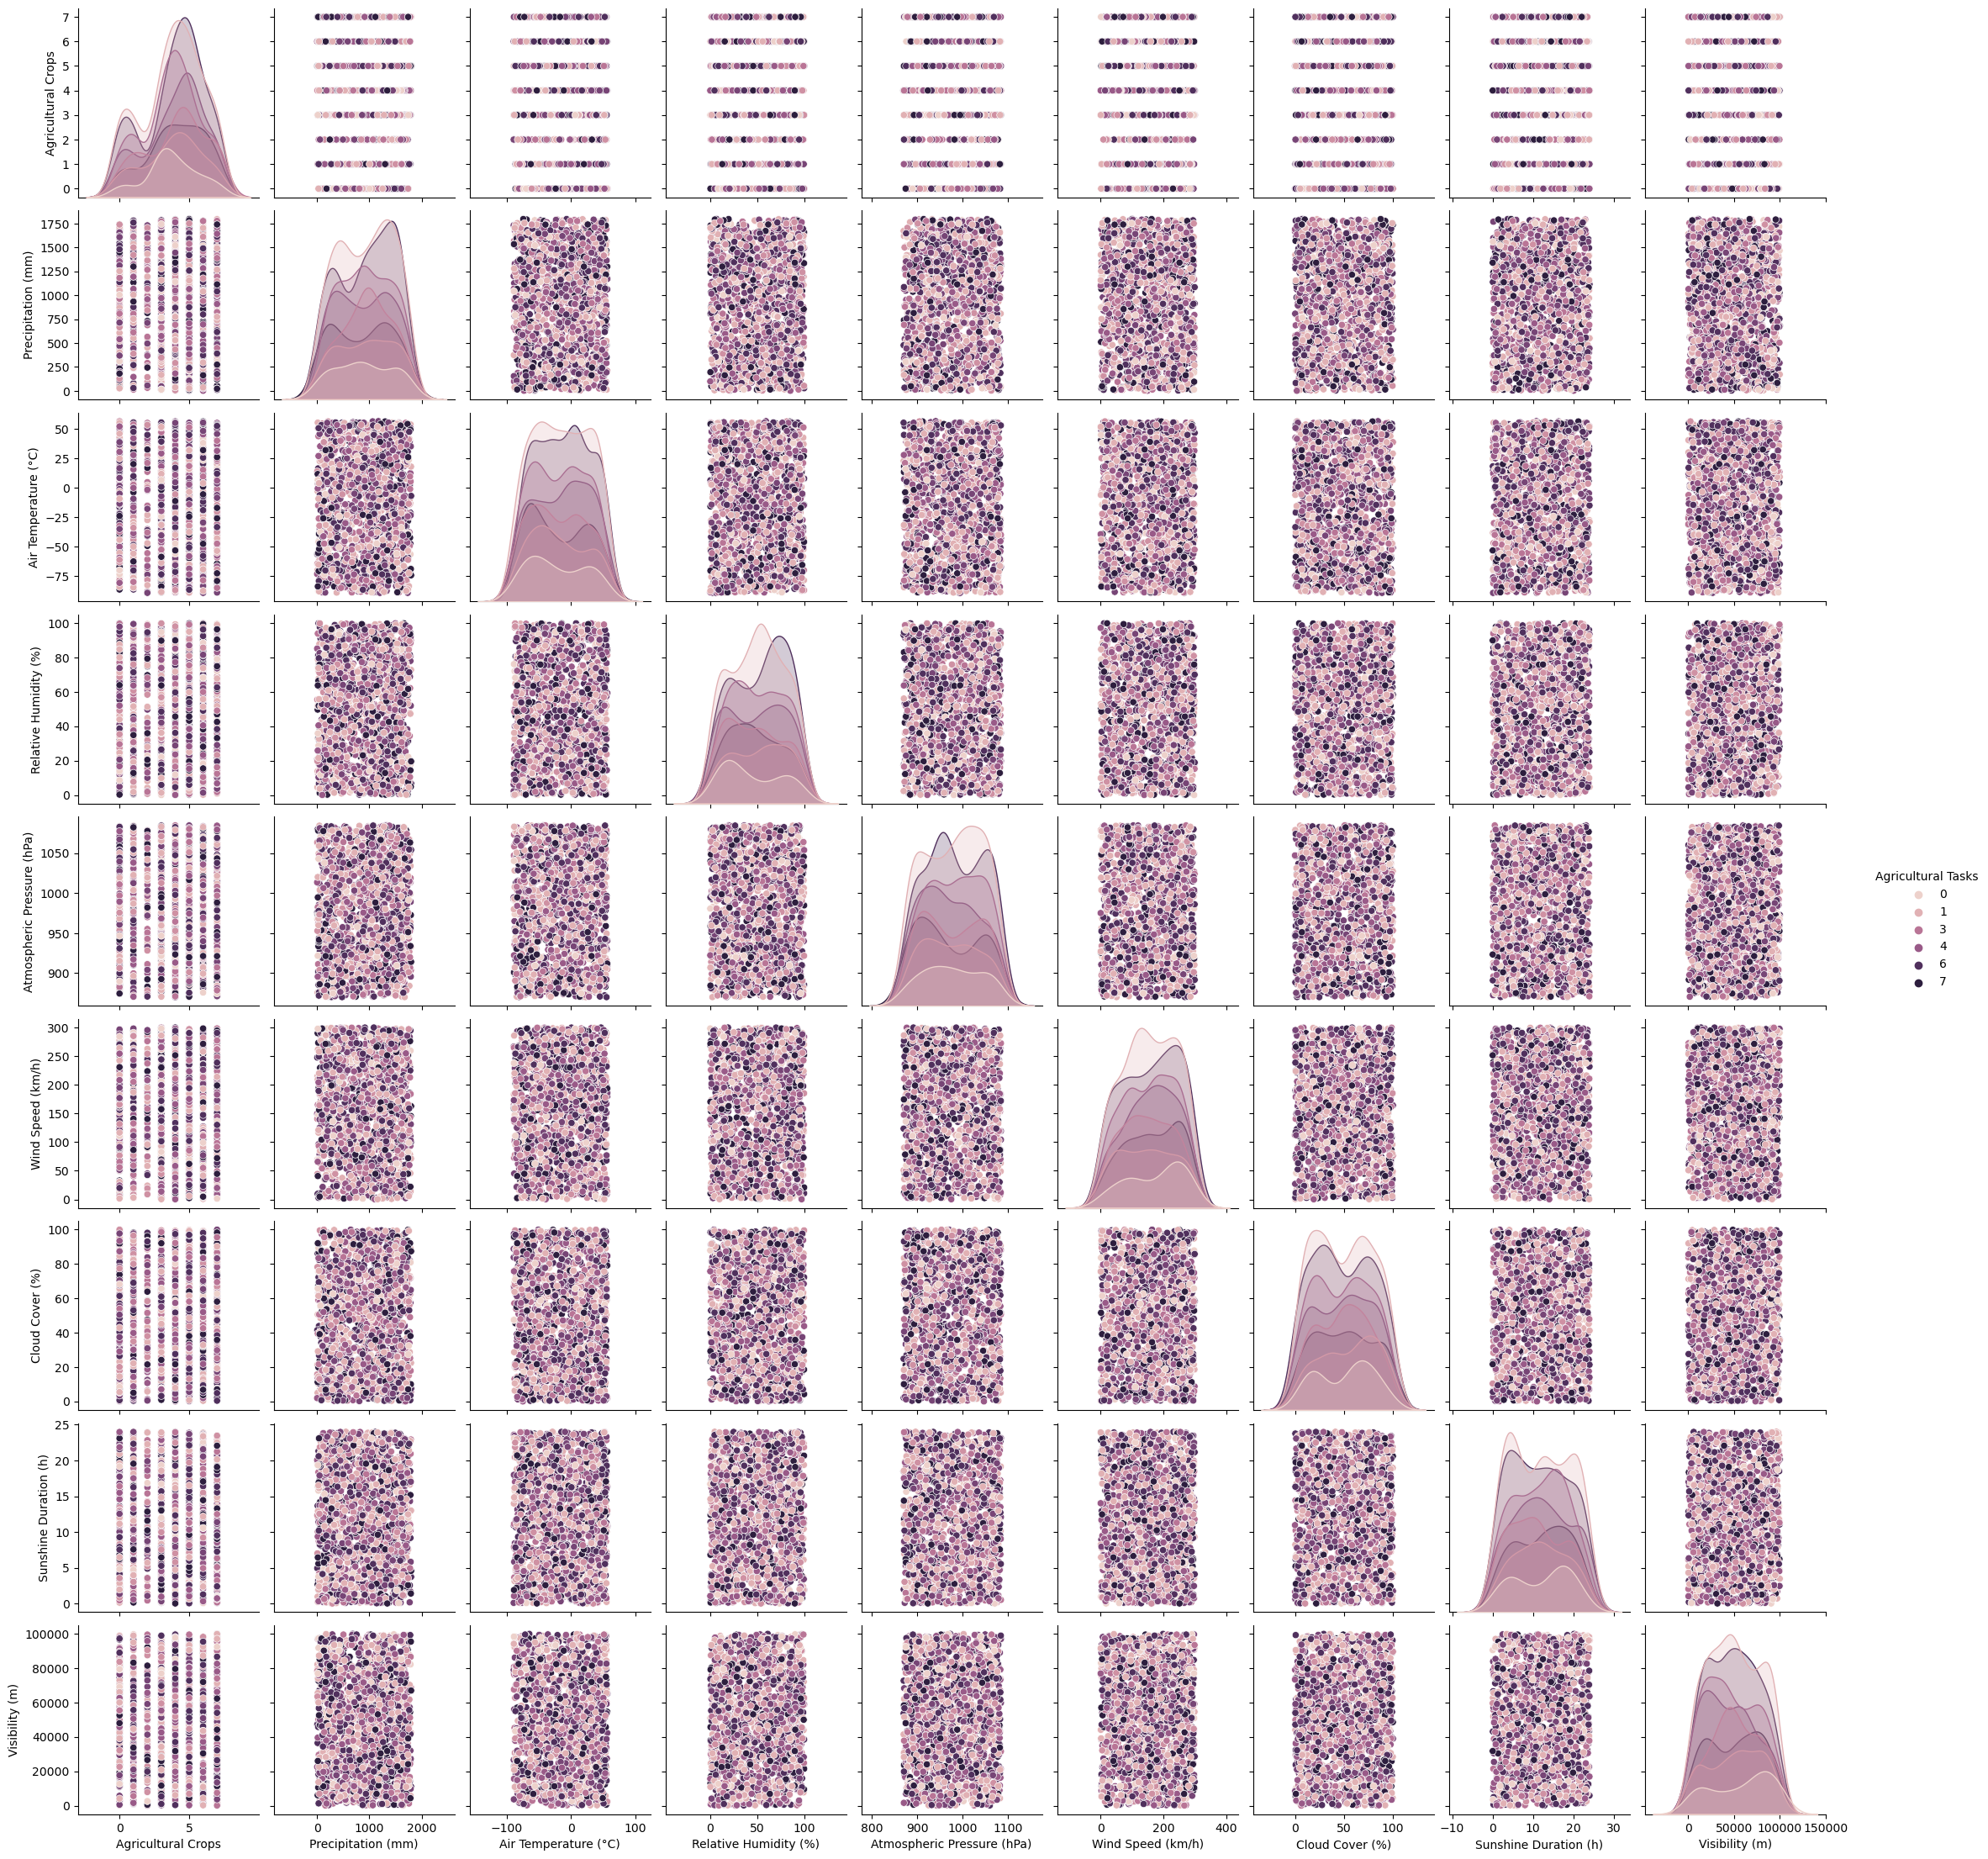

In [15]:
sns.pairplot(dataframe, hue='Agricultural Tasks')

# Développement du modèle

## Division des données

In [56]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X

Agricultural Crops  Precipitation (mm)  Air Temperature (°C)  \
Date                                                                       
2020-01-01                   5          591.411406            -64.889231   
2020-01-02                   6          257.416005            -84.230200   
2020-01-03                   1          843.924296            -41.835330   
2020-01-04                   7         1386.551951             28.142885   
2020-01-05                   3          242.287414            -30.041595   
...                        ...                 ...                   ...   
2024-05-26                   5          658.885753            -81.566248   
2024-05-27                   1         1751.952211            -11.436950   
2024-05-28                   1          167.377475             31.979444   
2024-05-29                   5          324.629730            -87.632106   
2024-05-30                   1         1210.035321            -33.994376   

            Relative Humidity (%)  Atmospheric Pressure (hPa)  \
Date                                                            
2020-01-01              25.851696                  903.210619   
2020-01-02              98.712129                 1026.587364   
2020-01-03              75.129531                  900.644906   
2020-01-04              94.620744                  949.690592   
2020-01-05              47.312174                 1062.577562   
...                           ...                         ...   
2024-05-26              50.079153                 1036.402605   
2024-05-27              74.473335                 1021.209936   
2024-05-28              85.997463                 1079.461969   
2024-05-29              15.629856                  928.304919   
2024-05-30              13.262253                  913.307823   

            Wind Speed (km/h)  Cloud Cover (%)  Sunshine Duration (h)  \
Date                                                                    
2020-01-01          40.009067        48.304379              15.358307   
2020-01-02          21.405984        54.404334              22.950390   
2020-01-03          59.677333        12.450563              21.732472   
2020-01-04          38.965979        41.271329               6.324999   
2020-01-05         241.015432         3.236693              20.206181   
...                       ...              ...                    ...   
2024-05-26         137.457617        30.225441              13.971599   
2024-05-27          98.740996        20.406985               2.452469   
2024-05-28         211.819798         4.465717              19.088921   
2024-05-29         170.717909        42.282709              16.548998   
2024-05-30         270.923391        95.480333               2.238445   

            Visibility (m)  
Date                        
2020-01-01    88742.086466  
2020-01-02    46081.545758  
2020-01-03    12678.823108  
2020-01-04    58795.788165  
2020-01-05    42850.788108  
...                    ...  
2024-05-26     6602.395368  
2024-05-27    46923.960644  
2024-05-28    93519.359933  
2024-05-29    34879.488743  
2024-05-30    54037.229978  

[1612 rows x 9 columns]

In [59]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
X_train_scaled

array([[ 0.61284305,  0.50711919, -0.99461659, ...,  0.81805468,
        -1.51324071,  0.96384769],
       [ 1.60028642, -1.437608  , -0.36162936, ...,  1.42129939,
         0.23070409, -1.08066545],
       [ 0.61284305, -0.34115797, -1.30668754, ...,  0.33431551,
         1.36041141, -1.58076104],
       ...,
       [ 0.61284305,  0.6485933 , -0.94894656, ..., -0.82757895,
        -0.13748606, -0.76968884],
       [ 0.11912137,  0.00348097, -1.10123574, ...,  0.00755887,
        -1.49860152, -0.58061918],
       [-0.37460032, -0.08191259, -0.69082343, ..., -0.1255123 ,
        -1.10538825,  0.94102802]])

In [61]:
# Entraînement du modèle avec la fonction d'activation sigmoïde
#mlp_model = MLPClassifier(hidden_layer_sizes=(16,16), activation='logistic', solver='adam', max_iter=10000)
#mlp_model.fit(X_train_scaled, y_train)

In [62]:
# Initialisation du modèle MLPClassifier pour une classification multiclasse
mlp_model = MLPClassifier(hidden_layer_sizes=(16, 16,32), activation='logistic', solver='adam',
                          max_iter=10000, alpha=0.0005, batch_size='auto',
                          learning_rate='constant', learning_rate_init=0.005,
                          power_t=0.5, shuffle=True, random_state=None, tol=0.0001,
                          verbose=False, warm_start=False, momentum=0.9,
                          nesterovs_momentum=True, early_stopping=False,
                          validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                          epsilon=1e-08, n_iter_no_change=10)

In [63]:
mlp_model.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.0005,
              hidden_layer_sizes=(16, 16, 32), learning_rate_init=0.005,
              max_iter=10000)

In [64]:
# Prédictions
y_test_pred = mlp_model.predict(X_test_scaled)
y_train_pred = mlp_model.predict(X_train_scaled)

In [65]:
y_train_pred

array([1, 6, 0, ..., 1, 1, 5], dtype=int8)

In [66]:
import tensorflow as tf
# Prédire les probabilités pour chaque classe
probabilities = mlp_model.predict_proba(X_train_scaled)
# Afficher les probabilités pour chaque exemple de l'ensemble de test
for i, prob in enumerate(probabilities):
    print(f"Exemple {i + 1}:")
    # Créer une liste vide
    tableau = []
    for j, p in enumerate(prob):
        print(f"  Classe {j}: Probabilité {p:.4f}")
        tableau.append(p)
        
    print()
   
    # # Trouvez l'indice de la classe avec la probabilité la plus élevée
    predicted_class_index = tf.argmax(tableau).numpy()
    print("index de la probabilité la plus forte :",predicted_class_index)
    print("la probabilité la plus forte :",tableau[predicted_class_index])
    taux = tableau[predicted_class_index]*100
    # # Utilisez cet indice pour obtenir l'étiquette prédite
    predicted_class = agricultural_tasks[predicted_class_index]
    # # Affichez l'étiquette prédite
    print("certain à ",f"{taux:.2f} %","qu'il faut ",predicted_class)

Exemple 1:
  Classe 0: Probabilité 0.0000
  Classe 1: Probabilité 0.9008
  Classe 2: Probabilité 0.0000
  Classe 3: Probabilité 0.0000
  Classe 4: Probabilité 0.0977
  Classe 5: Probabilité 0.0014
  Classe 6: Probabilité 0.0000
  Classe 7: Probabilité 0.0000

index de la probabilité la plus forte : 1
la probabilité la plus forte : 0.9008400299826516
certain à  90.08 % qu'il faut  Prune
Exemple 2:
  Classe 0: Probabilité 0.0162
  Classe 1: Probabilité 0.0034
  Classe 2: Probabilité 0.0157
  Classe 3: Probabilité 0.0279
  Classe 4: Probabilité 0.0000
  Classe 5: Probabilité 0.0062
  Classe 6: Probabilité 0.9178
  Classe 7: Probabilité 0.0127

index de la probabilité la plus forte : 6
la probabilité la plus forte : 0.9178400472344428
certain à  91.78 % qu'il faut  Hoe
Exemple 3:
  Classe 0: Probabilité 0.3651
  Classe 1: Probabilité 0.2546
  Classe 2: Probabilité 0.0874
  Classe 3: Probabilité 0.0917
  Classe 4: Probabilité 0.0242
  Classe 5: Probabilité 0.1086
  Classe 6: Probabilité 0.0

In [67]:
# Évaluation du rappel (recall)
print(classification_report(y_test, y_test_pred, target_names=[f'Class {i}' for i in range(len(np.unique(y)))]))

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        18
     Class 1       0.28      0.27      0.27        71
     Class 2       0.07      0.08      0.08        25
     Class 3       0.10      0.11      0.11        28
     Class 4       0.17      0.19      0.18        52
     Class 5       0.10      0.11      0.10        19
     Class 6       0.24      0.24      0.24        76
     Class 7       0.22      0.18      0.20        34

    accuracy                           0.19       323
   macro avg       0.15      0.15      0.15       323
weighted avg       0.19      0.19      0.19       323



In [68]:
# Évaluation du rappel (recall)
print(classification_report(y_train, y_train_pred, target_names=[f'Class {i}' for i in range(len(np.unique(y)))]))

              precision    recall  f1-score   support

     Class 0       0.73      0.65      0.68        62
     Class 1       0.78      0.91      0.84       255
     Class 2       0.77      0.77      0.77       112
     Class 3       0.83      0.76      0.79       118
     Class 4       0.77      0.80      0.78       200
     Class 5       0.74      0.63      0.68       156
     Class 6       0.82      0.89      0.85       269
     Class 7       0.62      0.44      0.51       117

    accuracy                           0.77      1289
   macro avg       0.76      0.73      0.74      1289
weighted avg       0.77      0.77      0.77      1289



In [69]:
# Prédictions de classe
y_train_class_pred = mlp_model.predict(X_train_scaled)
y_test_class_pred = mlp_model.predict(X_test_scaled)

# Prédictions de probabilité
y_train_prob_pred = mlp_model.predict_proba(X_train_scaled)
y_test_prob_pred = mlp_model.predict_proba(X_test_scaled)

# Calcul des métriques
train_accuracy = accuracy_score(y_train, y_train_class_pred)
test_accuracy = accuracy_score(y_test, y_test_class_pred)

# Pour roc_auc_score, spécifiez multi_class et average
train_auc = roc_auc_score(y_train, y_train_prob_pred, multi_class='ovr', average='macro')
test_auc = roc_auc_score(y_test, y_test_prob_pred, multi_class='ovr', average='macro')

# Pour recall_score, spécifiez average
train_recall = recall_score(y_train, y_train_class_pred, average='macro')
test_recall = recall_score(y_test, y_test_class_pred, average='macro')

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")
print(f"Train Recall: {train_recall:.2f}")
print(f"Test Recall: {test_recall:.2f}")

performance_table = pd.DataFrame({
    'Métrique':['Accuracy','AUC','Recall'],
    'Ensemble d\'Entrainement':[train_accuracy,train_auc,train_recall],
    'Ensemble de Test':[test_accuracy,test_auc,test_recall]
})

Train Accuracy: 0.77
Test Accuracy: 0.19
Train AUC: 0.96
Test AUC: 0.51
Train Recall: 0.73
Test Recall: 0.15


In [70]:
print(performance_table)

   Métrique  Ensemble d'Entrainement  Ensemble de Test
0  Accuracy                 0.772692          0.185759
1       AUC                 0.961080          0.509565
2    Recall                 0.729739          0.145704


Feature ranking:
1. feature Agricultural Crops (0.034985)
2. feature Cloud Cover (%) (0.031889)
3. feature Wind Speed (km/h) (0.018885)
4. feature Relative Humidity (%) (0.015789)
5. feature Precipitation (mm) (0.013622)
6. feature Air Temperature (°C) (0.008978)
7. feature Sunshine Duration (h) (0.006811)
8. feature Atmospheric Pressure (hPa) (0.001858)
9. feature Visibility (m) (-0.004025)


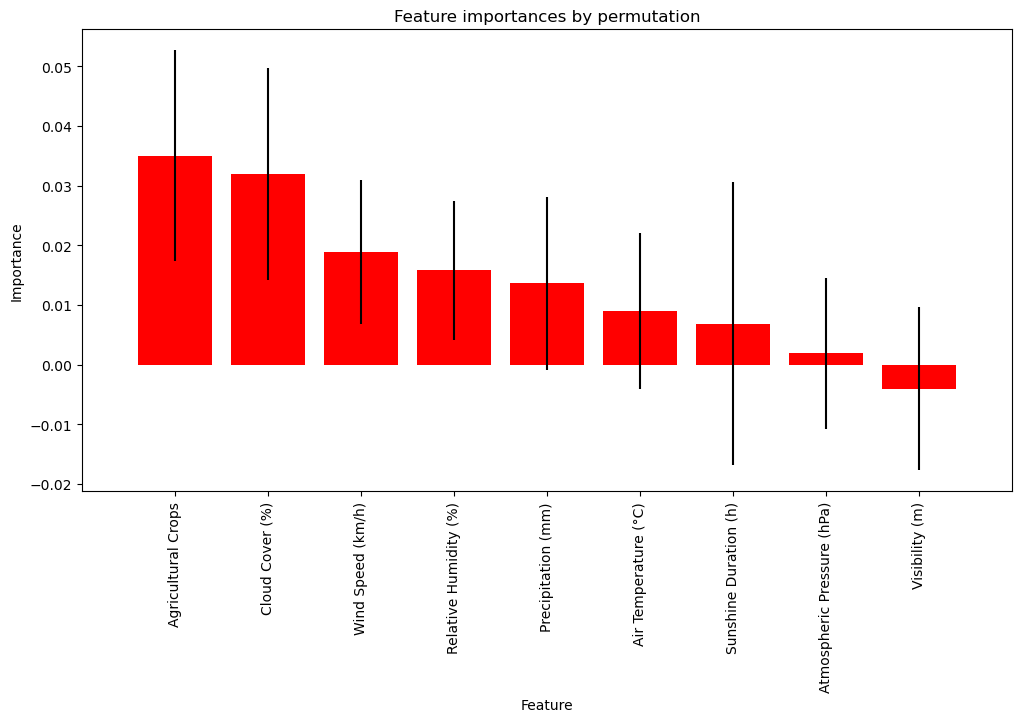

In [71]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Entraînez votre modèle comme d'habitude
# smlp_model.fit(X_train_scaled, y_train)

# Calculez l'importance des variables par permutation
result = permutation_importance(mlp_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Extraire les importances et leurs erreurs
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

# Récupération des noms des variables
feature_names = X.columns

# Affichage des résultats
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. feature {feature_names[indices[i]]} ({importances[indices[i]]:.6f})")

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature importances by permutation")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

y_train_binarized shape: (1289, 8)
y_train_score shape: (1289, 8)
y_test_binarized shape: (323, 8)
y_test_score shape: (323, 8)


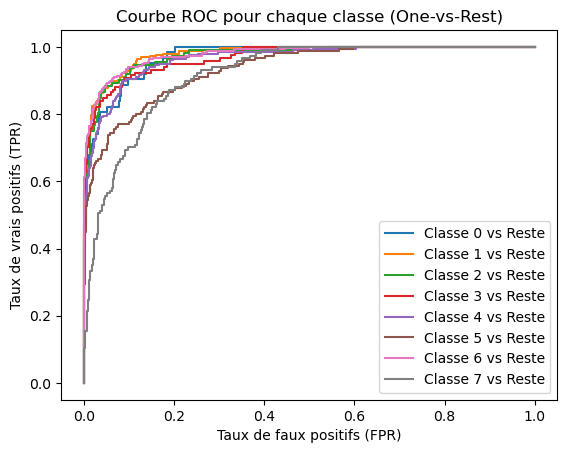

AUC (One-vs-One) : 0.9610800528218523
AUC (One-vs-Rest) : 0.9610800528218523
AUC (One-vs-One) : 0.5095654727149674
AUC (One-vs-Rest) : 0.5095654727149674


In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Prédire les probabilités pour chaque classe sur la base de train
y_train_score = mlp_model.predict_proba(X_train_scaled)

# Prédire les probabilités pour chaque classe sur la base de test
y_test_score = mlp_model.predict_proba(X_test_scaled)

# Binariser les classes pour les courbes ROC multiclasses
y_train_binarized = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7])
n_classes = y_train_binarized.shape[1]

# Binariser les labels pour un problème multiclasses
y_test_binarized  = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])
n_classes = y_test_binarized.shape[1]

print("y_train_binarized shape:", y_train_binarized.shape)
print("y_train_score shape:", y_train_score.shape)


print("y_test_binarized shape:", y_test_binarized.shape)
print("y_test_score shape:", y_test_score.shape)


# Calculer la courbe ROC pour chaque classe
for i in range(8):  # Nombre de classes
    fpr, tpr, _ = roc_curve(y_train_binarized[:, i], y_train_score[:, i])
    plt.plot(fpr, tpr, label=f'Classe {i} vs Reste')

# Afficher la courbe ROC
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC pour chaque classe (One-vs-Rest)')
plt.legend()
plt.show()

# Calcul de l'AUC pour chaque classe sur la base de train ovo
auc_train_ovo = roc_auc_score(y_train_binarized, y_train_score, multi_class='ovo')
print(f'AUC (One-vs-One) : {auc_train_ovo}')
# Calcul de l'AUC pour chaque classe sur la base de test ovr
auc_train_ovr = roc_auc_score(y_train_binarized, y_train_score, multi_class='ovr')
print(f'AUC (One-vs-Rest) : {auc_train_ovr}')

# Calcul de l'AUC pour chaque classe sur la base de test ovo
auc_ovo = roc_auc_score(y_test_binarized, y_test_score, multi_class='ovo')
print(f'AUC (One-vs-One) : {auc_ovo}')

# Calcul de l'AUC pour chaque classe sur la base de test ovr
auc_ovr = roc_auc_score(y_test_binarized, y_test_score, multi_class='ovr')
print(f'AUC (One-vs-Rest) : {auc_ovr}')

y_train_binarized shape: (1289, 8)
y_train_score shape: (1289, 8)
y_test_binarized shape: (323, 8)
y_test_score shape: (323, 8)


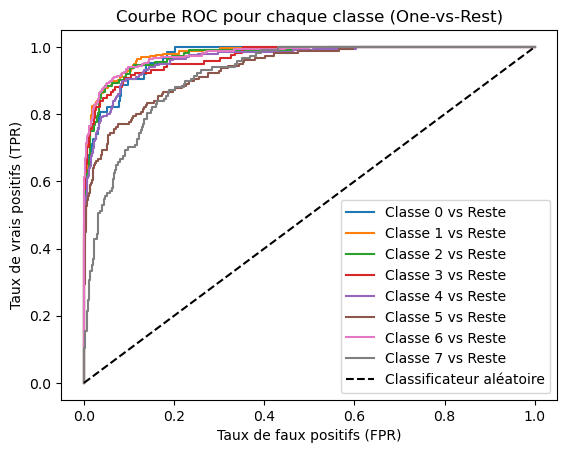

AUC (One-vs-One) : 0.9610800528218523
AUC (One-vs-Rest) : 0.9610800528218523
AUC (One-vs-One) : 0.5095654727149674
AUC (One-vs-Rest) : 0.5095654727149674


In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Prédire les probabilités pour chaque classe sur la base de train
y_train_score = mlp_model.predict_proba(X_train_scaled)

# Prédire les probabilités pour chaque classe sur la base de test
y_test_score = mlp_model.predict_proba(X_test_scaled)

# Binariser les classes pour les courbes ROC multiclasses
y_train_binarized = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7])
n_classes = y_train_binarized.shape[1]

# Binariser les labels pour un problème multiclasses
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])
n_classes = y_test_binarized.shape[1]

print("y_train_binarized shape:", y_train_binarized.shape)
print("y_train_score shape:", y_train_score.shape)
print("y_test_binarized shape:", y_test_binarized.shape)
print("y_test_score shape:", y_test_score.shape)

# Initialiser la figure
plt.figure()

# Calculer la courbe ROC pour chaque classe
for i in range(n_classes):  # Nombre de classes
    fpr, tpr, _ = roc_curve(y_train_binarized[:, i], y_train_score[:, i])
    plt.plot(fpr, tpr, label=f'Classe {i} vs Reste')

# Ajouter la diagonale
plt.plot([0, 1], [0, 1], 'k--', label='Classificateur aléatoire')

# Ajouter des étiquettes et une légende
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC pour chaque classe (One-vs-Rest)')
plt.legend()
plt.show()

# Calcul de l'AUC pour chaque classe sur la base de train ovo
auc_train_ovo = roc_auc_score(y_train_binarized, y_train_score, multi_class='ovo')
print(f'AUC (One-vs-One) : {auc_train_ovo}')

# Calcul de l'AUC pour chaque classe sur la base de train ovr
auc_train_ovr = roc_auc_score(y_train_binarized, y_train_score, multi_class='ovr')
print(f'AUC (One-vs-Rest) : {auc_train_ovr}')

# Calcul de l'AUC pour chaque classe sur la base de test ovo
auc_ovo = roc_auc_score(y_test_binarized, y_test_score, multi_class='ovo')
print(f'AUC (One-vs-One) : {auc_ovo}')

# Calcul de l'AUC pour chaque classe sur la base de test ovr
auc_ovr = roc_auc_score(y_test_binarized, y_test_score, multi_class='ovr')
print(f'AUC (One-vs-Rest) : {auc_ovr}')


In [75]:
import joblib

# Entraînez votre modèle comme d'habitude
# mlp_model.fit(X_train_scaled, y_train)

# Sauvegarder le modèle
joblib.dump(mlp_model, 'mlp_model.joblib')
joblib.dump(scaler, 'scaling.joblib')

['scaling.joblib']